In [8]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [9]:
# Connect to the SQLite database (since it's in the same folder, you can just use the filename)
db_path = 'metadata-110mil.sqlite'
conn = sqlite3.connect(db_path)

# Check available tables in the database (optional)
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Available tables:", tables)

# Specify the table you want to load
table_name = 'metadata'  # Replace with your actual table name

# Load the table into a DataFrame
df = pd.read_sql_query(f"SELECT * FROM {table_name};", conn)

# Close the database connection
conn.close()

# Display the first few rows of the DataFrame
df.head()


Available tables:        name
0  metadata


,Path,Title,Author,Category,Genre,Language,Status,Published,Updated,Packaged,Rating,Chapters,Words,Publisher,Story URL,Author URL,Summary,word_count,chapter_count,story_id
0,Fanfiction/Halo_ Mass Effect/Completed/Halo_ M...,The Distant Strains of Triumph,SpartanDelta2,"Halo, Mass Effect","Drama, Sci-Fi",English,Completed,2013-07-15,2013-07-15,2013-10-28 09:08:08,M,1,"1,180",www.fanfiction.net,http://www.fanfiction.net/s/9493934/1/,http://www.fanfiction.net/u/2727455/SpartanDelta2,"A project for my class, a challenge from my te...",1180,1,9493934
1,Fanfiction/Halo_ Mass Effect/Completed/Halo_ M...,Mass Effect: Beyond,Cunningham-Hughes,"Halo, Mass Effect","Adventure, Sci-Fi",English,Completed,2012-10-01,2012-10-01,2013-07-21 09:44:53,T,1,"9,971",www.fanfiction.net,http://www.fanfiction.net/s/8573953/1/,http://www.fanfiction.net/u/4262625/Cunningham...,A hardcore Mass Effect fan's retelling of the ...,9971,1,8573953
2,Fanfiction/Halo_ Mass Effect/Completed/Halo_ M...,Chaos Infinitium,Sysero of Cain,"Halo, Mass Effect","Adventure, Sci-Fi",English,Completed,2011-03-11,2011-11-17,2014-11-23 22:48:57,T,5,"19,447",www.fanfiction.net,https://www.fanfiction.net/s/6816070/1/,https://www.fanfiction.net/u/2362265/Sysero-of...,First Contact never seems to go well. But thin...,19447,5,6816070
3,Fanfiction/Halo_ Mass Effect/Completed/Halo_ M...,Tools of Defiance,Magisking,"Halo, Mass Effect","Angst, Tragedy",English,Completed,2013-12-22,2013-12-22,2014-02-07 23:48:12,T,1,997,www.fanfiction.net,https://www.fanfiction.net/s/9946669/1/,https://www.fanfiction.net/u/5244687/Magisking,A One-shot that takes place in the Defiance un...,997,1,9946669
4,Fanfiction/Halo_ Mass Effect/Completed/Halo_ M...,Mass Effect New Origins V2,erttheking,"Halo, Mass Effect","Romance, Sci-Fi",English,Completed,2010-10-05,2012-06-09,2014-05-25 15:31:13,T,109,"442,687",www.fanfiction.net,https://www.fanfiction.net/s/6376514/1/,https://www.fanfiction.net/u/1835782/erttheking,"On the dawn of the 27th century, the UNSC disc...",442687,109,6376514


In [10]:
test = df.iloc[0]
print(test)

Path             Fanfiction/Halo_ Mass Effect/Completed/Halo_ M...
Title                               The Distant Strains of Triumph
Author                                               SpartanDelta2
Category                                         Halo, Mass Effect
Genre                                                Drama, Sci-Fi
Language                                                   English
Status                                                   Completed
Published                                               2013-07-15
Updated                                                 2013-07-15
Packaged                                       2013-10-28 09:08:08
Rating                                                           M
Chapters                                                         1
Words                                                        1,180
Publisher                                       www.fanfiction.net
Story URL                   http://www.fanfiction.net/s/949393

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set the font to a universal one like Noto Sans
#rcParams['font.sans-serif'] = ['Noto Sans', 'DejaVu Sans', 'Arial Unicode MS']  # Ensure Noto Sans is installed
#rcParams['axes.unicode_minus'] = False  # Avoid issues with minus signs

# Load your data (assuming it's already in a DataFrame `df`)
# df = pd.read_csv('your_file.csv')  # Uncomment this if you're loading from a CSV file

# Split categories by commas and stack them to get a single column of all categories
#all_categories = df['Category'].str.split(',').explode()

# Strip any extra whitespace from each category (important if there are spaces after commas)
#all_categories = all_categories.str.strip()

# Count occurrences of each unique category
#category_counts = all_categories.value_counts()

# Filter categories to include only those with at least 500 occurrences
#filtered_category_counts = category_counts[category_counts >= 10000]

# Plot as a bar chart
#plt.figure(figsize=(20, 6))
#filtered_category_counts.plot(kind='bar', color='skyblue')
#plt.title('Distribution of Categories (at least 10000 entries)')
#plt.xlabel('Category')
#plt.ylabel('Count')
#plt.xticks(rotation=90, ha='right')
#plt.tight_layout()
#plt.show()


![category_distribution](category_distribution.png)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Take a random sample of 100,000 rows (adjust the number as needed for performance)
#sample_df = df['word_count'].sample(100000, random_state=42)

#plt.figure(figsize=(10, 6))
#sns.histplot(sample_df, bins=50, kde=True)

#plt.xlabel("Word Count")
#plt.ylabel("Frequency")
#plt.title("Distribution of Word Count (Sampled)")

#plt.show()


![word distribution](word_distribution.png)

<h2> Cleaning and Formating Data: </h2>

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704321 entries, 0 to 6704320
Data columns (total 20 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   Path           object
 1   Title          object
 2   Author         object
 3   Category       object
 4   Genre          object
 5   Language       object
 6   Status         object
 7   Published      object
 8   Updated        object
 9   Packaged       object
 10  Rating         object
 11  Chapters       object
 12  Words          object
 13  Publisher      object
 14  Story URL      object
 15  Author URL     object
 16  Summary        object
 17  word_count     object
 18  chapter_count  object
 19  story_id       object
dtypes: object(20)
memory usage: 1023.0+ MB


In [14]:
missing_all_values = df[df["Publisher"] == ""].value_counts()#.index.tolist()
len(missing_all_values) # TODO: Clean all that are missing. 79 missing is rows that dont hae any value beside path

79

In [15]:
rows_with_null = (df.isnull()).sum()
rows_with_null

Path             0
Title            0
Author           0
Category         0
Genre            0
Language         0
Status           0
Published        0
Updated          0
Packaged         0
Rating           0
Chapters         0
Words            0
Publisher        0
Story URL        0
Author URL       0
Summary          0
word_count       0
chapter_count    0
story_id         0
dtype: int64

In [16]:
rows_with_missing_values = (df.isnull() | (df == "")).any(axis=1).sum()
rows_with_missing_values

652658

In [17]:
rows_with_missing_values / len(df) * 100

9.734885904180304

In [18]:
all_missing = (df == "").sum()
all_missing

Path                  0
Title               142
Author               83
Category            120
Genre            652471
Language             79
Status               79
Published            81
Updated              81
Packaged             81
Rating               79
Chapters             79
Words                79
Publisher            79
Story URL            79
Author URL           79
Summary             210
word_count           79
chapter_count        79
story_id             79
dtype: int64

In [19]:
# Changing data type for chapter and word count into int type

df['word_count'] = pd.to_numeric(df['word_count'], errors='coerce').astype('Int64')
df['chapter_count'] = pd.to_numeric(df['chapter_count'], errors='coerce').astype('Int64')

In [20]:
#df_usable = df.copy(deep=True) 

# Remove redundant  and unimportant columns

df_usable = df.drop(columns=['Chapters', 'Words','Path','Story URL','Author URL'])

# remove rows where all values are missing (79 of those)

df_usable = df_usable[df_usable['word_count'] != '']

# All where summary, genre and category is missing

df_usable = df_usable[df_usable['Summary'] != '']
df_usable = df_usable[df_usable['Category'] != '']
df_usable = df_usable[df_usable['Genre'] != '']

# Removing extreme word count values  (100 < x < 2,000,000)

df_usable = df_usable[(df_usable['word_count'] > 100) & (df_usable['word_count'] < 2000000)]


In [21]:
# Counting after cleaning all the missing
missing = (df_usable == "").sum()
missing

Title            34
Author            3
Category          0
Genre             0
Language          0
Status            0
Published         2
Updated           2
Packaged          2
Rating            0
Publisher         0
Summary           0
word_count        0
chapter_count     0
story_id          0
dtype: Int64

In [22]:
df_usable.columns

Index(['Title', 'Author', 'Category', 'Genre', 'Language', 'Status',
       'Published', 'Updated', 'Packaged', 'Rating', 'Publisher', 'Summary',
       'word_count', 'chapter_count', 'story_id'],
      dtype='object')

In [23]:
len(df_usable)

6014325

In [24]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Ensure nltk resources are downloaded
import nltk
nltk.download('punkt')  # Tokenizer data
nltk.download('wordnet')  # Lemmatizer data
nltk.download('stopwords')  # Stopwords data
nltk.download('omw-1.4')  # WordNet data
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kaur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kaur\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kaur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\kaur\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\kaur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [25]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
custom_stop_words = set(stopwords.words('english')).union(ENGLISH_STOP_WORDS)

# Preprocessing function
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabet characters
    text = text.lower()  # Lowercase text
    tokens = word_tokenize(text)  # Tokenize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in custom_stop_words]  # Lemmatize and remove stopwords
    return tokens

# Apply preprocessing to Title and Summary
df_usable['processed_title'] = df_usable['Title'].apply(preprocess_text)
df_usable['processed_summary'] = df_usable['Summary'].apply(preprocess_text)

# Combine title and summary
df_usable['combined_text'] = df_usable['processed_title'] + df_usable['processed_summary']

# Group by Category and Genre
grouped_data = df_usable.groupby(['Category', 'Genre'])

# Collect unique words for each group
unique_words_by_group = defaultdict(list)

for (category, genre), group in grouped_data:
    all_words = [word for text in group['combined_text'] for word in text]
    unique_words = set(all_words)  # Find unique words
    unique_words_by_group[(category, genre)] = unique_words

# Convert to DataFrame for easier analysis
unique_words_df = pd.DataFrame([
    {'Category': k[0], 'Genre': k[1], 'Unique_Words': list(v)} 
    for k, v in unique_words_by_group.items()
])

In [26]:
unique_words_df

,Category,Genre,Unique_Words
0,$#*! My Dad Says,"Adventure, Mystery","[recently, entered, bright, distance, blind, b..."
1,$#*! My Dad Says,"Angst, Fantasy","[dsktgj, siempre, posdi, afd, rdpflkbkjcjiztxes]"
2,$#*! My Dad Says,"Crime, Mystery","[caused, david, offline, work, farther, hacker..."
3,$#*! My Dad Says,"Crime, Romance","[predator, teenager, neighbor, catch, really, ..."
4,$#*! My Dad Says,Drama,"[acostumbrada, se, queria, popular, suceso, ez..."
...,...,...,...
332830,풀하우스,Humor,"[harville, newest, e, varios, going, planned, ..."
332831,풀하우스,"Humor, Parody","[sur, got, secret, story, histoire, married, h..."
332832,풀하우스,"Humor, Romance","[good, character, cool, exo, belongs, like, lo..."
332833,풀하우스,"Mystery, Spiritual","[midnight, homin]"


In [27]:
unique_words_df[unique_words_df["Unique_Words"].apply(len) == 0]

,Category,Genre,Unique_Words
36,'da Kink in My Hair,Romance,[]
39,(500) Days of Summer,"Adventure, Poetry",[]
173,+Anima,"Poetry, Sci-Fi",[]
529,".hack/SIGN, 7 Days to Die","Romance, Supernatural",[]
797,1,Angst,[]
...,...,...,...
332224,Zothique series,"Poetry, Western",[]
332225,abc Akasaka Boys Cabaret/abc★赤坂ボーイズキャバレー,"Adventure, Tragedy",[]
332478,ourWorld,"Angst, Horror",[]
332764,"Дом, в котором",Angst,[]


In [28]:
df_usable[df_usable["Category"].str.contains("Harry", case=False, na=False)]

,Title,Author,Category,Genre,Language,Status,Published,Updated,Packaged,Rating,Publisher,Summary,word_count,chapter_count,story_id,processed_title,processed_summary,combined_text
1814,Becoming Animagi: Red Version,Spongyllama,"Harry Potter, Pokémon",Parody,English,Completed,2009-08-25,2010-09-30,2013-09-16 09:39:59,K+,www.fanfiction.net,Harry Potter/Pokémon Crossover and Parody. Har...,1808,2,5331029,"[animagi, red, version]","[harry, potterpokmon, crossover, parody, harry...","[animagi, red, version, harry, potterpokmon, c..."
1815,Pokemon Meet Harry Potter,Liquidshadowcenter,"Harry Potter, Pokémon","Humor, Parody",English,Completed,2003-01-11,2003-11-07,2013-05-11 00:27:53,K,www.fanfiction.net,The Poke Hero's go to Hogwarts.,1827,8,1173117,"[pokemon, meet, harry, potter]","[poke, hero, hogwarts]","[pokemon, meet, harry, potter, poke, hero, hog..."
1816,The Genesis of Pikachu,Ice fire and water,"Harry Potter, Pokémon",Humor,English,Completed,2009-07-26,2009-07-26,2013-09-12 13:38:35,K+,www.fanfiction.net,Ever wonder where Ash's Pikachu came from? Wel...,344,1,5250550,"[genesis, pikachu]","[wonder, ash, pikachu, came, youll, crackfic, ...","[genesis, pikachu, wonder, ash, pikachu, came,..."
1817,Harry Potter and the Master's Ball,Mr. Chaos,"Harry Potter, Pokémon",Adventure,English,Completed,2013-05-18,2013-08-18,2013-10-07 23:41:46,K+,www.fanfiction.net,"Welcome to the Avalon Region. Here, children g...",88119,21,9305868,"[harry, potter, master, ball]","[welcome, avalon, region, child, hogwarts, pre...","[harry, potter, master, ball, welcome, avalon,..."
1818,Challenge Abigail Ketchum Advertisement,aspygirlredo,"Harry Potter, Pokémon",Adventure,English,Completed,2014-02-04,2014-02-04,2014-04-15 17:33:21,K,www.fanfiction.net,A little Advertisement for my Harry Potter and...,593,1,10082541,"[challenge, abigail, ketchum, advertisement]","[little, advertisement, harry, potter, pokemon...","[challenge, abigail, ketchum, advertisement, l..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6701804,Forbidden Love,NickyLovett,"Harry Potter, Sweeney Todd","Drama, Romance",English,In-Progress,2014-08-21,2014-08-21,2014-11-28 07:39:34,M,www.fanfiction.net,Nellie and Bellatrix are twins but what happen...,1561,2,10637239,"[forbidden, love]","[nellie, bellatrix, twin, happens, nellie, pla...","[forbidden, love, nellie, bellatrix, twin, hap..."
6701805,Polyjuice Potion?,Yoga Girl,"Harry Potter, Sweeney Todd","Drama, Humor",English,In-Progress,2009-09-25,2009-09-25,2013-09-19 15:05:41,T,www.fanfiction.net,The characters of Sweeny Todd and Harry Potter...,983,1,5401202,"[polyjuice, potion]","[character, sweeny, todd, harry, potter, colli...","[polyjuice, potion, character, sweeny, todd, h..."
6701806,Forbidden Feeling,BeautifulRedRubies,"Harry Potter, Sweeney Todd","Drama, Romance",English,In-Progress,2013-05-20,2013-05-20,2013-10-08 12:19:18,M,www.fanfiction.net,Mrs. Lovett meets a witch from another world. ...,644,1,9312672,"[forbidden, feeling]","[mr, lovett, meet, witch, world, bella, find, ...","[forbidden, feeling, mr, lovett, meet, witch, ..."
6701807,I Know You,BellatrixLacedInBlack,"Harry Potter, Sweeney Todd","Friendship, Romance",English,In-Progress,2010-11-03,2010-11-03,2014-06-19 21:03:17,T,www.fanfiction.net,Bellatrix and Lucy Barker become more than fri...,1168,1,6449450,[know],"[bellatrix, lucy, barker, friend]","[know, bellatrix, lucy, barker, friend]"


<h2> Build a model </h2>

In [29]:
df_usable["Category"].value_counts()

Category
Harry Potter                          625990
Naruto                                349016
Twilight                              198298
Hetalia - Axis Powers                 106964
Glee                                  101342
                                       ...  
Ghostbusters, Transformers                 1
Desert Punk, Naruto                        1
Suite Life series, Vampire Diaries         1
Artemis Fowl, Ella Enchanted               1
Don Quixote, Hetalia - Axis Powers         1
Name: count, Length: 65387, dtype: int64

In [30]:
df_usable["word_count"].sum()

52837381774

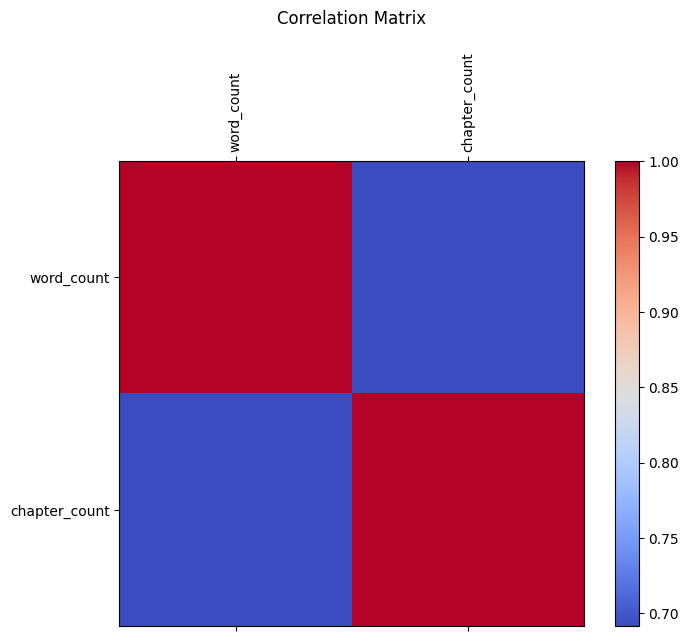

,word_count,chapter_count
word_count,1.000000,0.691608
chapter_count,0.691608,1.000000


In [31]:
numerical_columns = df[['word_count', 'chapter_count']].copy()

# Convert these columns to numeric (if needed)
numerical_columns = numerical_columns.apply(pd.to_numeric, errors='coerce')

# Drop any rows with NaN values in numerical columns to avoid calculation issues
numerical_columns = numerical_columns.dropna()

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.title("Correlation Matrix", pad=20)
plt.show()

correlation_matrix

In [32]:
df.shape

(6704321, 20)

In [33]:
df['word_count'] = pd.to_numeric(df['word_count'], errors='coerce').astype('Int64')
df[df["word_count"] > 2000000]

,Path,Title,Author,Category,Genre,Language,Status,Published,Updated,Packaged,Rating,Chapters,Words,Publisher,Story URL,Author URL,Summary,word_count,chapter_count,story_id
784875,Fanfiction/Candy Candy/In-Progress/Candy Candy...,El amor es una cosa simple,Tattys Grand,Candy Candy,"Drama, Romance",Spanish,In-Progress,2011-02-20,2014-02-04,2014-11-05 23:30:43,M,254,"2,749,008",www.fanfiction.net,https://www.fanfiction.net/s/6761776/1/,https://www.fanfiction.net/u/2528645/Tattys-Grand,¿Que pasa cuando solo somos peones del destino...,2749008,254,6761776
1322094,Fanfiction/Oh My Goddess_/In-Progress/Oh My Go...,Trial By Tenderness,Cevn,Oh My Goddess!,"Drama, Sci-Fi",English,In-Progress,2001-11-06,2010-05-07,2013-04-19 07:03:32,M,164,"2,159,022",www.fanfiction.net,http://www.fanfiction.net/s/445254/1/,http://www.fanfiction.net/u/122664/Cevn,TBT: A self-insert FanNovel immersing the read...,2159022,164,445254
1636550,Fanfiction/Pok_mon/In-Progress/Pok_mon - Ri2 -...,Brave New World,Ri2,Pokémon,Adventure,English,In-Progress,2008-06-12,2013-03-06,2013-06-17 05:42:26,T,62,"2,127,638",www.fanfiction.net,http://www.fanfiction.net/s/4319623/1/,http://www.fanfiction.net/u/159540/Ri2,"The end of the world has come and gone, and a ...",2127638,62,4319623
1892151,Fanfiction/Mass Effect/Completed/Mass Effect -...,The Spirit of Redemption,Myetel,Mass Effect,"Adventure, Sci-Fi",English,Completed,2011-02-11,2014-10-14,2014-10-29 11:31:40,M,162,"3,404,794",www.fanfiction.net,https://www.fanfiction.net/s/6735812/1/,https://www.fanfiction.net/u/2720337/Myetel,The Spectres fight against threats to both the...,3404794,162,6735812
2617284,Fanfiction/Highlander_ Stargate_ SG-1/Complete...,THE 8TH CHEVRON AND EVERYTHING AFTERWARDS,FORD B,"Highlander, Stargate: SG-1","Adventure, Sci-Fi",English,Completed,2005-02-10,2010-07-04,2013-08-25 14:36:46,M,145,"2,166,024",www.fanfiction.net,http://www.fanfiction.net/s/2257696/1/,http://www.fanfiction.net/u/323967/FORD-B,"There's a new member to the SG1 family, and he...",2166024,145,2257696
2943057,Fanfiction/Super Smash Brothers/In-Progress/Su...,The Subspace Emissary's Worlds Conquest,AuraChannelerChris,Super Smash Brothers,"Fantasy, Humor",English,In-Progress,2008-03-04,2013-05-28,2013-05-29 15:25:20,T,206,"3,490,444",www.fanfiction.net,http://www.fanfiction.net/s/4112682/1/,http://www.fanfiction.net/u/1394189/AuraChanne...,"Chapter 206: Joshua's Week - My Partner, My Ki...",3490444,206,4112682
3254906,Fanfiction/Katekyo Hitman Reborn_/Completed/Ka...,Flames and Family IV: Intended Path,madashes2ashes,Katekyo Hitman Reborn!,Drama,English,Completed,2008-07-06,2010-04-05,2013-06-21 18:57:45,M,161,"2,225,275",www.fanfiction.net,http://www.fanfiction.net/s/4374658/1/,http://www.fanfiction.net/u/1446765/madashes2a...,Sequel to Flames and Family III. Tsuna runs aw...,2225275,161,4374658
5394624,Fanfiction/Digimon_ Star Wars_ The Clone Wars/...,Secret of the 327th,Fergus Flamacron,"Digimon, Star Wars: The Clone Wars","Adventure, Sci-Fi",English,Completed,2009-12-22,2012-02-29,2013-09-30 10:38:46,T,220,"2,291,357",www.fanfiction.net,http://www.fanfiction.net/s/5600553/1/,http://www.fanfiction.net/u/2064553/Fergus-Fla...,"Sequel to A Sticky Situation. Terriermon, Rena...",2291357,220,5600553
5474272,Fanfiction/Game X-overs/Completed/Game X-overs...,"Tales of The Cosmic Wars Vol Three, Light of Hope",Darth Necron,Game X-overs,"Adventure, Fantasy",English,Completed,2009-06-06,2012-10-20,2013-08-29 02:43:24,T,94,"2,403,604",www.fanfiction.net,http://www.fanfiction.net/s/5118160/1/,http://www.fanfiction.net/u/1240504/Darth-Necron,Part three of the Tales of the Cosmic Wars tri...,2403604,94,5118160
5568444,Fanfiction/Misc. Books/In-Progress/Misc. Books...,Covered In Chocolate I,Penguins In Toasters,Misc. Books,Hurt-Comfort,English,In-Progress,2011-04-07,2011-04-23,2014-12-18 04:26:54,K,116,"12,751,087",www.fanfiction.net,https://www.fanfiction.net/s/6886493/1/,https://www.fanfiction.net/u/2606247/Penguins-...,"Well, this is 

In [34]:
df.iloc[5568444]["Summary"]

'Well, this is basically a repetition of the words, "Covered in chocolate". I know it may seem really stupid to you guys, but I have a civic\'s test tomorrow morning and I can\'t sleep...  more inside!'

In [35]:
df["Status"].value_counts()

Status
In-Progress    3420439
Completed      3283803
                    79
Name: count, dtype: int64

In [36]:
#print(len(all_categories.unique()))#9975

In [37]:
df.iloc[12430]['Summary']
df.iloc[12430]

Path             Fanfiction/Continuum/Completed/Continuum - Loc...
Title            Continuing to Move Back in Time When Kiera mee...
Author                                                  LocutusTNG
Category                                                 Continuum
Genre                                                Drama, Sci-Fi
Language                                                   English
Status                                                   Completed
Published                                               2014-01-29
Updated                                                 2014-02-18
Packaged                                       2014-04-09 14:33:34
Rating                                                           M
Chapters                                                        27
Words                                                       26,345
Publisher                                       www.fanfiction.net
Story URL                 https://www.fanfiction.net/s/1006405

In [38]:
# Count occurrences in the "Category" column
category_counts = df_usable['Category'].value_counts()
valid_categories = category_counts[category_counts >= 100].index
df_filtered = df_usable[df_usable['Category'].isin(valid_categories)]
df_usable=df_filtered
print(len(df_usable['Category'].unique()))

2060


In [39]:
df_usable.head()
df_usable = df_usable.drop(columns=['Packaged', 'Publisher'])


In [40]:
df_usable.shape
# Specify the output file
output_file = "filtered_usable_df.csv"

# Save to CSV
df_usable.to_csv(output_file, sep=";", encoding="utf-8", index=False)  # Set index=False to avoid saving the index

print(f"DataFrame successfully written to {output_file}")

DataFrame successfully written to filtered_usable_df.csv


In [42]:
df_usable2 = pd.read_csv("filtered_usable_df.csv", sep=";")
print(df_usable2.shape)

(5742878, 16)


In [45]:
df_usable.head()

,Title,Author,Category,Genre,Language,Status,Published,Updated,Rating,Summary,word_count,chapter_count,story_id,processed_title,processed_summary,combined_text
0,The Distant Strains of Triumph,SpartanDelta2,"Halo, Mass Effect","Drama, Sci-Fi",English,Completed,2013-07-15,2013-07-15,M,"A project for my class, a challenge from my te...",1180,1,9493934,"[distant, strain, triumph]","[project, class, challenge, teacher, got, appa...","[distant, strain, triumph, project, class, cha..."
1,Mass Effect: Beyond,Cunningham-Hughes,"Halo, Mass Effect","Adventure, Sci-Fi",English,Completed,2012-10-01,2012-10-01,T,A hardcore Mass Effect fan's retelling of the ...,9971,1,8573953,"[mass, effect]","[hardcore, mass, effect, fan, retelling, respe...","[mass, effect, hardcore, mass, effect, fan, re..."
2,Chaos Infinitium,Sysero of Cain,"Halo, Mass Effect","Adventure, Sci-Fi",English,Completed,2011-03-11,2011-11-17,T,First Contact never seems to go well. But thin...,19447,5,6816070,"[chaos, infinitium]","[contact, thing, worse, happens, civilization,...","[chaos, infinitium, contact, thing, worse, hap..."
3,Tools of Defiance,Magisking,"Halo, Mass Effect","Angst, Tragedy",English,Completed,2013-12-22,2013-12-22,T,A One-shot that takes place in the Defiance un...,997,1,9946669,"[tool, defiance]","[oneshot, take, place, defiance, universe, det...","[tool, defiance, oneshot, take, place, defianc..."
4,Mass Effect New Origins V2,erttheking,"Halo, Mass Effect","Romance, Sci-Fi",English,Completed,2010-10-05,2012-06-09,T,"On the dawn of the 27th century, the UNSC disc...",442687,109,6376514,"[mass, effect, new, origin, v]","[dawn, th, century, unsc, discovers, mass, rel...","[mass, effect, new, origin, v, dawn, th, centu..."
